In [1]:
from networkx.generators.community import LFR_benchmark_graph
import networkx as nx

n = 150 # num nodes
tau1 = 3 # exponent for degree distribution, > 1 !!
tau2 = 1.5 # exponent for community size, > 1 !!
mu = 0.1 # fraction of inter-community edges (out of all edges) (0<=mu<=1)
avg_deg = 5
min_community = 20
seed = 42
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=avg_deg, min_community=min_community, seed=seed)
communities = nx.community.louvain_communities(G, seed=seed)

In [2]:
def jaccard_sim(x,y):
    return len(x & y)/len(x | y)

def align_communities(true_communities, predicted_communities):
    realigned_communitites = []
    for t_com in true_communities:
        max_jac = -1
        best_match = []
        for p_com in predicted_communities:
            jac_score = jaccard_sim(t_com, p_com)
            if jac_score > max_jac:
                max_jac = jac_score
                best_match = p_com
                if jac_score >= 1.0:
                    break
        realigned_communitites += [best_match]
    return realigned_communitites


In [3]:
def compute_core_centrality(neighbours_list: list, community_set: set):
    neighbours_list = set(neighbours_list)
    degree = len(neighbours_list)

    k_in_community = len(neighbours_list & community_set)
    k_out_community = len(neighbours_list - community_set)

    core_centrality = 1 - (k_out_community / degree)

    return core_centrality

def compute_all_core_centrality(graph: nx.Graph, threshold) -> dict:
    soft_nodes = {}
    for node_idx in graph.nodes:
        core_centrality = compute_core_centrality(neighbours_list=graph.neighbors(node_idx), community_set=graph.nodes[node_idx]["community"])
        if core_centrality <= threshold:
            soft_nodes[node_idx] = core_centrality

    return soft_nodes

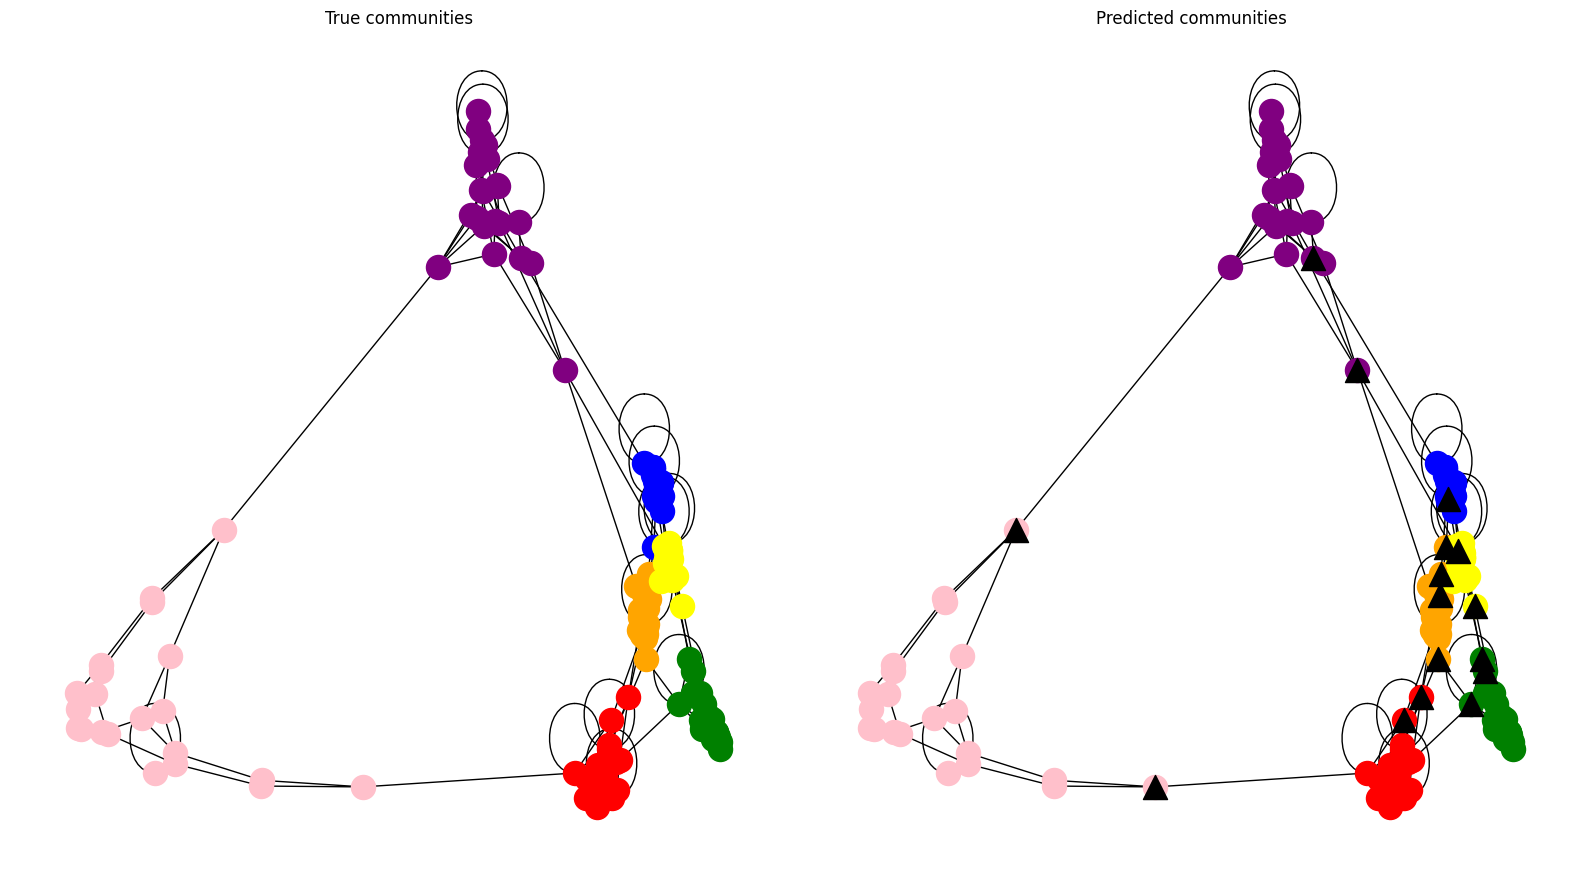

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2,figsize=(16,9))

colors = ["red", "green", "blue", "orange", "yellow", "purple", "pink", "brown"]
pos = nx.spectral_layout(G)

true_communities = {frozenset(G.nodes[v]["community"]) for v in G} # each node stores all of nodes from the community it is a part of
for nodes, color in zip(true_communities, colors):
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color, ax=axes[0])
axes[0].axis("off")
axes[0].set_title("True communities")
nx.draw_networkx_edges(G, pos, ax=axes[0])

soft_nodes_louvain = compute_all_core_centrality(G, threshold=0.8)
communities = align_communities(true_communities, communities)
for nodes, color in zip(communities, colors):
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color, ax=axes[1])
axes[1].axis("off")
axes[1].set_title("Predicted communities")
nx.draw_networkx_edges(G, pos, ax=axes[1])
nx.draw_networkx_nodes(G, pos, nodelist=list(soft_nodes_louvain.keys()), node_color="black", node_shape="^")

plt.tight_layout()
plt.show()

In [5]:
def draw_graph(graph: nx.Graph, com1, com2):
    pos_g = nx.spring_layout(graph, seed=42)
    nx.draw_networkx_nodes(graph, pos=pos_g, nodelist=com1, node_color="red")
    nx.draw_networkx_nodes(graph, pos=pos_g, nodelist=com2, node_color="blue")
    # nx.draw_networkx_nodes(custom_g, pos=pos_g, nodelist=list(soft_nodes.keys()), node_color="green")
    nx.draw_networkx_edges(graph, pos=pos_g)
    nx.draw_networkx_labels(graph, pos_g, {idx:idx for idx in range(1,graph.number_of_nodes()+1)}, font_color="whitesmoke")
    plt.show()

0.3671875


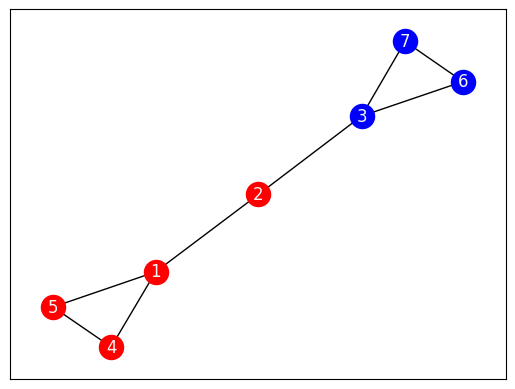

In [6]:
def add_community(g, node_list, com_idx):
    for node in node_list:
        g.add_node(node, community=set(node_list), community_idx=com_idx)

    return g

custom_g = nx.Graph()
com1 = [1,2,4,5]
com2 = [3,6,7]
custom_g = add_community(custom_g, com1, 1)
custom_g = add_community(custom_g, com2, 2)
custom_g.add_edges_from([(1,2),(2,3),(1,4),(1,5),(4,5),(3,6),(3,7),(6,7)])
soft_nodes = compute_all_core_centrality(custom_g, threshold=0.8)
communities = list(set(frozenset(custom_g.nodes[v]["community"]) for v in custom_g))
modularity = nx.algorithms.community.modularity(custom_g, communities=communities)
print(modularity)
draw_graph(custom_g, com1, com2)

-0.03125


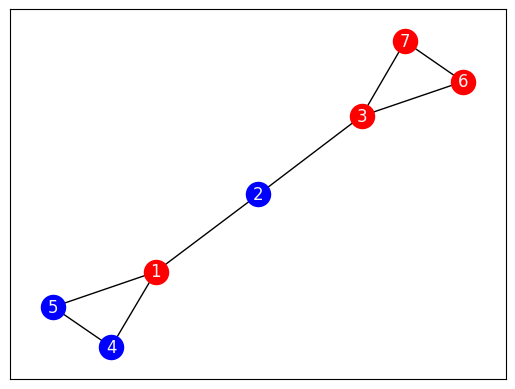

0.3671875


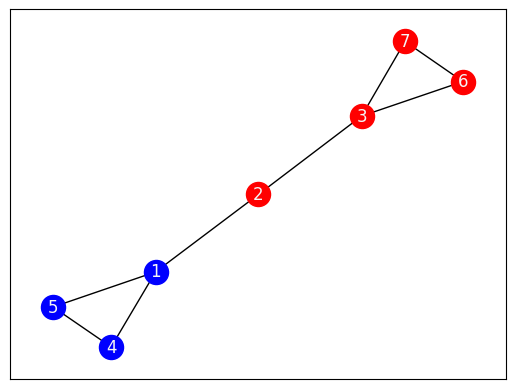

0.1171875


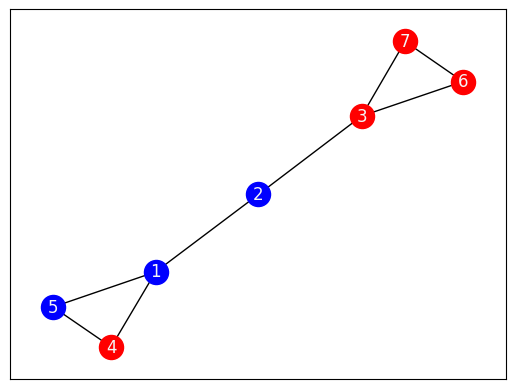

0.1171875


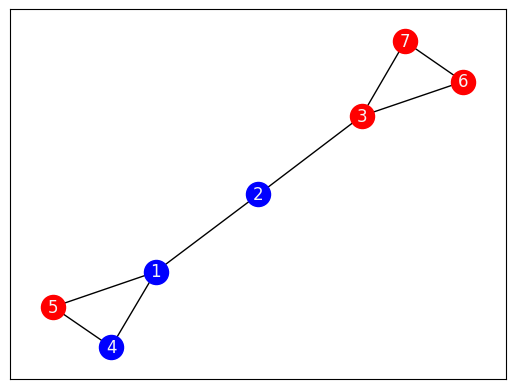

0.125


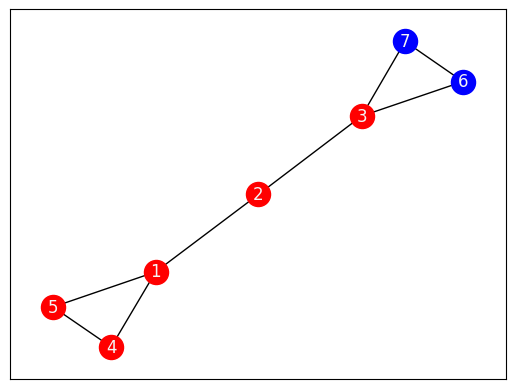

0.0546875


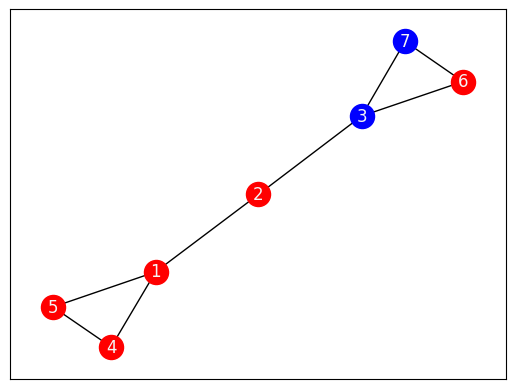

0.0546875


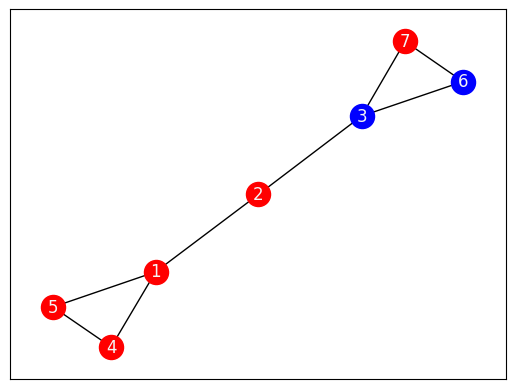

In [7]:
for node_idx in custom_g.nodes:
    aux_graph = custom_g
    current_com = custom_g.nodes[node_idx]["community"]
    for com in communities:
        if com == current_com:
            continue
        aux_com1 = com|set([node_idx])
        aux_com2 = current_com-set([node_idx])
        modularity = nx.algorithms.community.modularity(custom_g, communities=[aux_com1, aux_com2])
        print(modularity)
        draw_graph(custom_g, aux_com1, aux_com2)
        

0.3671875


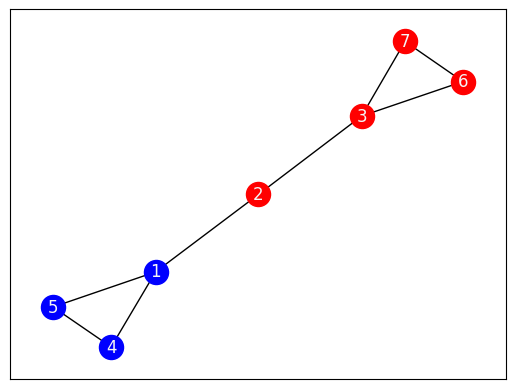

0.125


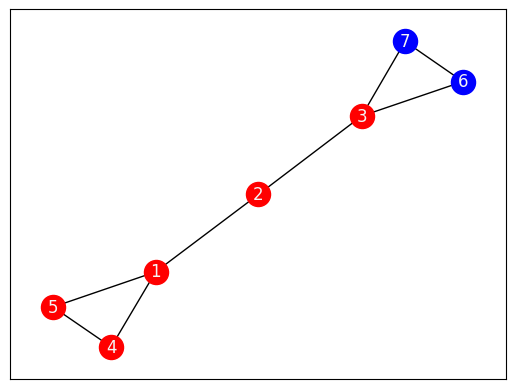

In [8]:
soft_nodes = compute_all_core_centrality(custom_g, threshold=0.8)
soft_nodes = list(soft_nodes.keys())
for node_idx in soft_nodes:
    aux_graph = custom_g
    current_com = custom_g.nodes[node_idx]["community"]
    for com in communities:
        if com == current_com:
            continue
        aux_com1 = com|set([node_idx])
        aux_com2 = current_com-set([node_idx])
        modularity = nx.algorithms.community.modularity(custom_g, communities=[aux_com1, aux_com2])
        print(modularity)
        draw_graph(custom_g, aux_com1, aux_com2)
        

In [19]:
n = 100000 # num nodes
tau1 = 3 # exponent for degree distribution, > 1 !!
tau2 = 1.5 # exponent for community size, > 1 !!
mu = 0.1 # fraction of inter-community edges (out of all edges) (0<=mu<=1)
avg_deg = 5
min_community = 200
seed = 42
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=avg_deg, min_community=min_community, seed=seed)

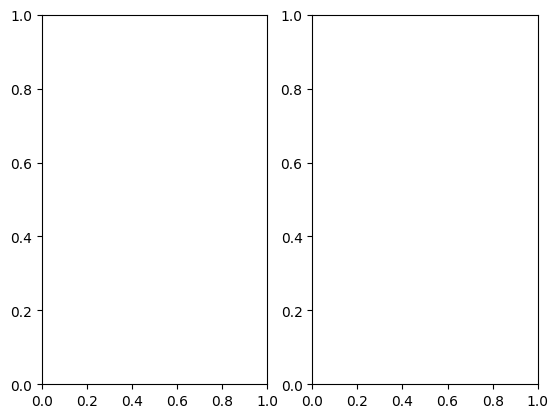

In [20]:
from louvain_variant import louvain_variant
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# load the karate club graph
fig, axes = plt.subplots(1,2)
# G = nx.karate_club_graph()
# G = nx.les_miserables_graph()


# compute the best partition
partition = louvain_variant.best_partition(G, core_threshold=0, random_state=42)
partition_orig = community_louvain.best_partition(G, random_state=42)

# draw the graph
# pos = nx.spring_layout(G, seed=42)
# # color the nodes according to their partition
# cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

#### OWN VARIANT OF LOUVAIN WITH THRESHOLD
# nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,
#                        cmap=cmap, node_color=list(partition.values()), ax=axes[0])
# # nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40)
# nx.draw_networkx_labels(G, pos, font_size=10, font_color="whitesmoke", ax=axes[0], labels={n:idx for idx, n in enumerate(G)})
# nx.draw_networkx_edges(G, pos, alpha=0.5, ax=axes[0])
# axes[0].set_title("Modified Louvain")

# #### ORIGINAL VARIANT
# nx.draw_networkx_nodes(G, pos, partition_orig.keys(), node_size=100,
#                        cmap=cmap, node_color=list(partition_orig.values()), ax=axes[1])
# # nx.draw_networkx_nodes(G, pos, partition_orig.keys(), node_size=40)
# nx.draw_networkx_labels(G, pos, font_size=10, font_color="whitesmoke", ax=axes[1], labels={n:idx for idx, n in enumerate(G)})
# nx.draw_networkx_edges(G, pos, alpha=0.5, ax=axes[1])
# axes[1].set_title("Original Louvain")
# plt.show()

OWN: 2.27596116065979 seconds // 0.927 || VS || ORIGINAL: 5.063505172729492 seconds //0.929


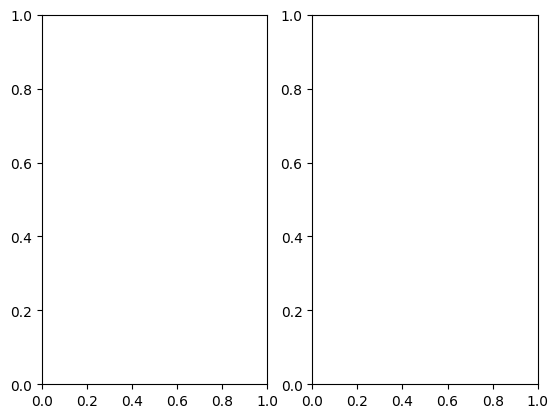

In [21]:
# G.add_edge(16,100)
# G.add_edge(100,10)
# G.add_edge(100,17)
# G.remove_edge(5,10)
# G.remove_edge(5,16)
# G.remove_edge(5,6)
# G.remove_node(100)
# draw the graph
fig, axes = plt.subplots(1,2)
import time
from functools import partial

# partition[100] = -1
# @TODO: node removal and addition

def eval_time_com(method):
    start_time = time.time()
    partition = method()
    stop_time = time.time() - start_time
    return partition, stop_time


# partition_next = louvain_variant.best_partition(G, partition, random_state=42, core_threshold=1)
# partition_orig_next = community_louvain.best_partition(G, partition, random_state=42)

partition_next, time_own = eval_time_com(partial(louvain_variant.best_partition, G, partition, random_state=42, core_threshold=0.5))
partition_orig_next, time_orig = eval_time_com(partial(community_louvain.best_partition, G, partition, random_state=42))

print(f"OWN: {time_own} seconds // {community_louvain.modularity(partition_next,G):0.3f} || VS || ORIGINAL: {time_orig} seconds //{community_louvain.modularity(partition_orig_next,G):0.3f}")
# pos = nx.spring_layout(G, seed=42)
# # color the nodes according to their partition
# cmap = cm.get_cmap('viridis', max(partition_next.values()) + 1)

# #### OWN VARIANT OF LOUVAIN WITH THRESHOLD
# nx.draw_networkx_nodes(G, pos, partition_next.keys(), node_size=100,
#                        cmap=cmap, node_color=list(partition_next.values()), ax=axes[0])
# # nx.draw_networkx_nodes(G, pos, partition_next.keys(), node_size=40)
# nx.draw_networkx_labels(G, pos, font_size=10, font_color="whitesmoke", ax=axes[0], labels={n:idx for idx, n in enumerate(G)})
# nx.draw_networkx_edges(G, pos, alpha=0.5, ax=axes[0])
# axes[0].set_title("Modified Louvain")
# #### ORIGINAL VARIANT
# nx.draw_networkx_nodes(G, pos, partition_orig_next.keys(), node_size=100,
#                        cmap=cmap, node_color=list(partition_orig_next.values()), ax=axes[1])
# # nx.draw_networkx_nodes(G, pos, partition_orig.keys(), node_size=40)
# nx.draw_networkx_labels(G, pos, font_size=10, font_color="whitesmoke", ax=axes[1], labels={n:idx for idx, n in enumerate(G)})
# nx.draw_networkx_edges(G, pos, alpha=0.5, ax=axes[1])
# axes[1].set_title("Original Louvain")
# plt.show()